## Setup


In [2]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [3]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [4]:
nx = 21
nt = 21
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [5]:
eq_name = 'diff1d_decrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

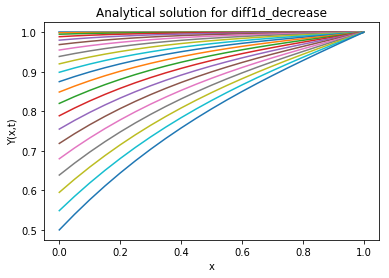

In [6]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [11]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
# Overflow with seed: 0
np.random.seed(1)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2018-10-03 21:28:50.556741
Optimization terminated successfully.
         Current function value: 0.000041
         Iterations: 2699
         Function evaluations: 2881
         Gradient evaluations: 2881
25min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.14040536353912e-05
 hess_inv: array([[ 2.33904387e+03, -1.57377844e+03,  1.05750293e+03, ...,
         5.45497990e+02, -1.08647895e+02,  1.11833006e+03],
       [-1.57377846e+03,  7.55084890e+03, -8.94306272e+03, ...,
         5.07381661e+03, -3.52564632e+04,  5.46954143e+03],
       [ 1.05750284e+03, -8.94306215e+03,  7.52835686e+04, ...,
        -2.15354192e+04,  1.24537645e+05, -2.23605973e+04],
       ...,
       [ 5.45497763e+02,  5.07381655e+03, -2.15354207e+04, ...,
         1.10967321e+04, -5.78336806e+04,  9.18477379e+03],
       [-1.08647639e+02, -3.52564625e+04,  1.24537648e+05, ...,
        -5.78336793e+04,  3.60509090e+05, -5.86228057e+04],
       [ 1.11833017e+03,  5.46954125e+03, -2.23605965

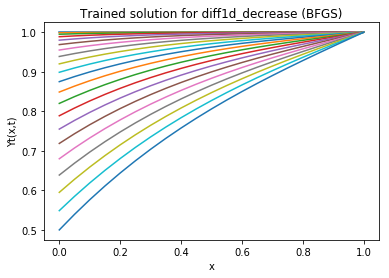

In [12]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
# plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

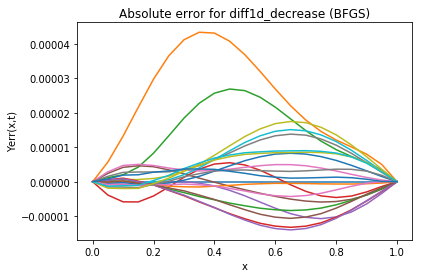

In [13]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
# plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

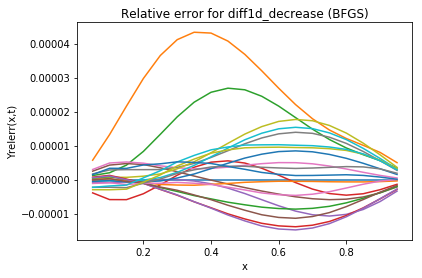

In [14]:
Yrelerr1 = (Yt1[:, 1:-1] - Ya[:, 1:-1])/Ya[:, 1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
# plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [7]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
# Overflow with seed: 0,1
np.random.seed(2)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

2018-10-04 10:49:28.205442
         Current function value: 0.000017
         Iterations: 8000
         Function evaluations: 8647
         Gradient evaluations: 8647
1h 28min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.7302919198931975e-05
 hess_inv: array([[ 6.20370218e+02,  8.19253118e+01,  4.21716628e+02, ...,
        -1.80593513e+03, -7.38975428e+02, -9.36434769e-01],
       [ 8.19254053e+01,  8.07725091e+01, -2.26728987e+01, ...,
        -6.32735303e+02, -6.55381004e+02, -3.10046089e+02],
       [ 4.21716756e+02, -2.26729974e+01,  5.55670761e+02, ...,
        -3.12968922e+01,  9.61254640e+02,  5.56121798e+02],
       ...,
       [-1.80593230e+03, -6.32736371e+02, -3.12930593e+01, ...,
         4.19244655e+04,  1.40080469e+04, -2.31141774e+03],
       [-7.38975399e+02, -6.55381165e+02,  9.61254678e+02, ...,
         1.40080399e+04,  1.30185869e+04,  1.66815959e+03],
       [-9.36558668e-01, -3.10045750e+02,  5.56121097e+02, ...,
        -2.31142873e+0

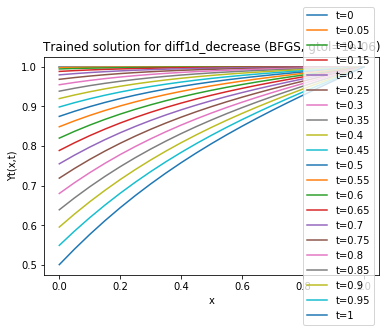

In [8]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

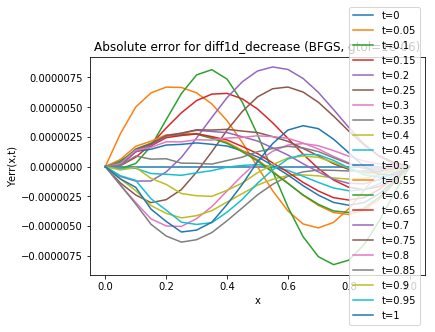

In [9]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

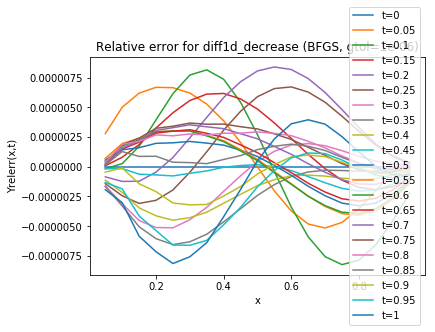

In [10]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-6, maxiter=16000)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
options['maxiter'] = 16000
opts = {}
# Overflow with seed: 0,1
np.random.seed(2)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

2018-10-04 12:37:11.823791
         Current function value: 0.000012
         Iterations: 16000
         Function evaluations: 17254
         Gradient evaluations: 17254
2h 56min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.2483333748196679e-05
 hess_inv: array([[ 4.80766076e+03,  1.90417727e+03,  6.92680763e+03, ...,
        -4.44338080e+04,  3.12691019e+04,  1.04878086e+05],
       [ 1.90417931e+03,  3.24039654e+03,  1.31093545e+03, ...,
         4.85011563e+03, -5.28822332e+03,  8.02306707e+03],
       [ 6.92681104e+03,  1.31094792e+03,  1.25922382e+04, ...,
        -9.71341633e+04,  6.76992491e+04,  2.39477766e+05],
       ...,
       [-4.44339330e+04,  4.84979788e+03, -9.71343682e+04, ...,
         1.17896447e+06, -8.37528597e+05, -2.42762252e+06],
       [ 3.12692431e+04, -5.28796487e+03,  6.76995265e+04, ...,
        -8.37529311e+05,  6.18934918e+05,  1.62664056e+06],
       [ 1.04877642e+05,  8.02381647e+03,  2.39476674e+05, ...,
        -2.42760321e

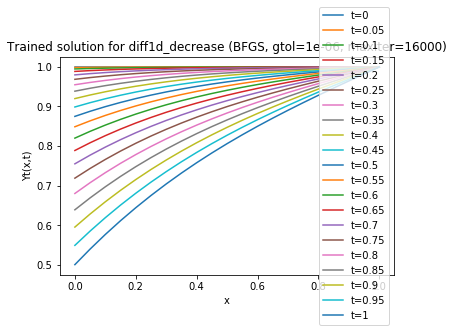

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

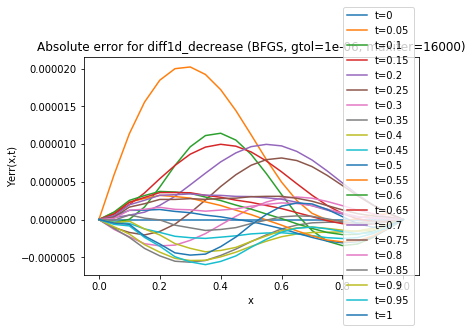

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

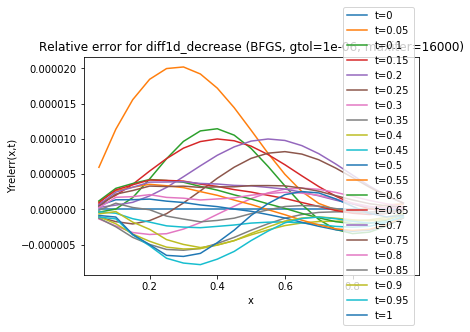

In [15]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

## BFGS (gtol=1e-6, maxiter=32000)

In [7]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
options['maxiter'] = 32000
opts = {}
# Overflow with seed: 0,1
np.random.seed(2)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

2018-10-04 20:46:08.265601
         Current function value: 0.000011
         Iterations: 23371
         Function evaluations: 25205
         Gradient evaluations: 25194
3h 53min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.1368416860824761e-05
 hess_inv: array([[ 7.15953075e+03,  3.17206982e+03,  9.02876677e+03, ...,
         8.67392190e+05, -1.51594948e+05,  4.44747955e+05],
       [ 3.17519430e+03,  7.35761766e+03,  3.48060187e+03, ...,
         2.44484999e+05, -5.47605081e+04,  2.43590563e+05],
       [ 9.03119796e+03,  3.47758222e+03,  1.32229240e+04, ...,
         1.30703760e+06, -2.27267944e+05,  6.57007151e+05],
       ...,
       [ 8.67490188e+05,  2.44063453e+05,  1.30704217e+06, ...,
         1.75344269e+08, -3.03043194e+07,  8.71348164e+07],
       [-1.51623749e+05, -5.46946319e+04, -2.27284486e+05, ...,
        -3.03056880e+07,  5.27505586e+06, -1.53099400e+07],
       [ 4.44871726e+05,  2.43410018e+05,  6.57100501e+05, ...,
         8.71445411

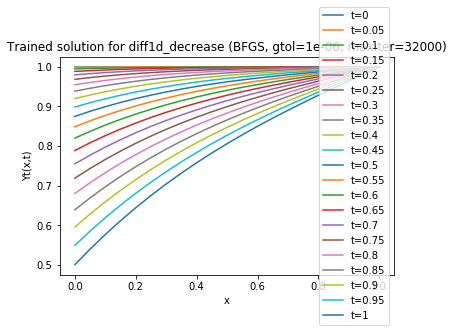

In [8]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

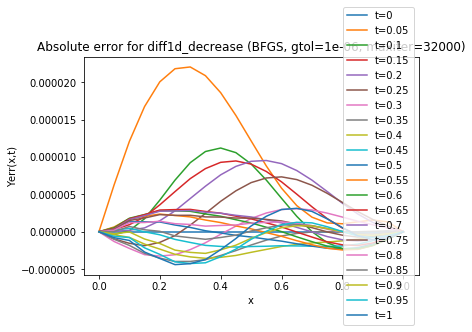

In [9]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

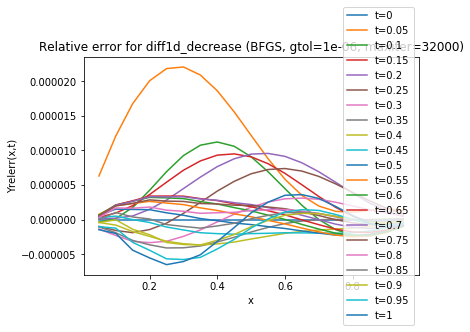

In [10]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));